# Goals of this notebook: 

- Read in orbit files
- Determine how some subhalo properties change with redshift
- Plot example orbits 


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from harvesting_tools.harvest_paths import SetupPaths


path_to_harvest = "/xdisk/gbesla/katiechambe/harvest"
paths = SetupPaths(path_to_harvest)

In [2]:
# initialize matplotlib params and update
plt.show();
plt.rcParams.update({'font.size':18,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18})


# Reading in orbit files

The process for reading in orbit files is much the same as opening the pair data files.

In [3]:
orb = h5py.File(f"{paths.path_orbits}highmass_major_99.hdf5", "r")

In [4]:
orb.keys()

<KeysViewHDF5 ['GroupFlag', 'GroupNum', 'GroupRvir', 'InfallRedshift', 'InfallSnapshot', 'MergeFlag', 'MergeRedshift', 'MergeSnapshot', 'PairKey', 'Redshift', 'RelativeVelocity', 'Scale', 'Separations', 'SeparationsComoving', 'SeparationsScaled', 'Snapshot', 'StellarMass1', 'StellarMass2', 'StellarMassRatio', 'SubfindID1', 'SubfindID2', 'SubhaloMass1', 'SubhaloMass2', 'SubhaloPos1', 'SubhaloPos2', 'SubhaloVel1', 'SubhaloVel2']>

This file contains the orbit data for each pair from the ```pairs/highmass_major_99.hdf5``` file. 

Once again, we can find the units by looking at the attributes of a subfolder of data in orbit:

In [5]:
orb["Separations"].attrs["Separations"]

'Physical separation between pair in kpc'

-- 

As in the previous notebook, let's create a dictionary for this data structure so that we don't have to worry about forgetting to close the hdf5 file

In [6]:
orb.close()

# initialize the dictionary structure
orbits = {}
f = h5py.File(f"{paths.path_orbits}highmass_major_99.hdf5", "r")
for key, val in f.items():
    if key == "Header":
        # we are doing to ignore the header data for now~ 
        continue 
    
    print(f"Adding key to dictionary: {key}")
    orbits[key] = np.array(val)
    
f.close()  # <---- the most important line in this cell to include!! 

Adding key to dictionary: GroupFlag
Adding key to dictionary: GroupNum
Adding key to dictionary: GroupRvir
Adding key to dictionary: InfallRedshift
Adding key to dictionary: InfallSnapshot
Adding key to dictionary: MergeFlag
Adding key to dictionary: MergeRedshift
Adding key to dictionary: MergeSnapshot
Adding key to dictionary: PairKey
Adding key to dictionary: Redshift
Adding key to dictionary: RelativeVelocity
Adding key to dictionary: Scale
Adding key to dictionary: Separations
Adding key to dictionary: SeparationsComoving
Adding key to dictionary: SeparationsScaled
Adding key to dictionary: Snapshot
Adding key to dictionary: StellarMass1
Adding key to dictionary: StellarMass2
Adding key to dictionary: StellarMassRatio
Adding key to dictionary: SubfindID1
Adding key to dictionary: SubfindID2
Adding key to dictionary: SubhaloMass1
Adding key to dictionary: SubhaloMass2
Adding key to dictionary: SubhaloPos1
Adding key to dictionary: SubhaloPos2
Adding key to dictionary: SubhaloVel1
A

In [7]:
orbits.keys()

dict_keys(['GroupFlag', 'GroupNum', 'GroupRvir', 'InfallRedshift', 'InfallSnapshot', 'MergeFlag', 'MergeRedshift', 'MergeSnapshot', 'PairKey', 'Redshift', 'RelativeVelocity', 'Scale', 'Separations', 'SeparationsComoving', 'SeparationsScaled', 'Snapshot', 'StellarMass1', 'StellarMass2', 'StellarMassRatio', 'SubfindID1', 'SubfindID2', 'SubhaloMass1', 'SubhaloMass2', 'SubhaloPos1', 'SubhaloPos2', 'SubhaloVel1', 'SubhaloVel2'])

In [8]:
np.shape(orbits["Separations"])

(389, 100)

The shape of the separations data is 398 rows of arrays with 100 elements in each array, which means there are 389 pairs in the z=0 pairs file, and we have the information about each pair at each of the 100 snapshots in the simulation! 

In [9]:
orbits["Separations"][0] # the separation of the pair at each snapshot

array([          nan,           nan,  821.44252278,  882.52931742,
        952.81235777, 1001.58421944, 1035.38959869, 1088.05453975,
       1133.5664066 , 1180.10496539, 1223.04968181, 1252.06978594,
       1320.93308044, 1393.9154253 , 1419.00545548, 1471.27464799,
       1524.41797358, 1569.23006978, 1633.05067076, 1687.74841252,
       1747.58826582, 1787.22593843, 1857.29553405, 1905.66455717,
       1959.54992725, 2035.72953274, 2065.25220998, 2110.6770202 ,
       2160.16633105, 2196.8491799 , 2220.66641833, 2227.82625586,
       2235.40433629, 2248.3210793 , 2273.78597683, 2288.38218094,
       2294.01639508, 2313.77736942, 2310.11730223, 2290.42305287,
       2283.71355853, 2257.00322835, 2233.2056629 , 2208.64527198,
       2177.4117144 , 2150.02022994, 2107.39696126, 2072.97180788,
       2035.02417117, 1992.22886082, 1942.80176889, 1873.05371157,
       1826.8303997 , 1762.24539163, 1698.27808269, 1633.31460066,
       1582.32371083, 1510.6637958 , 1458.66236367, 1386.60089

The data is ordered from z = 27 (snapshot 0) to z=0 (snapshot 99). We can read in our snapshot-redshift conversion file which makes it a little easier to see what order things are in: 

In [10]:
f = h5py.File(f"{paths.path_data}misc/snapshot_data.hdf5","r")
convert = {}
for key,val in f.items():
    convert[key] = np.array(val)
f.close()

In [11]:
convert["Redshift"] # the corresponding redshift of each separation above

array([2.00464910e+01, 1.49891732e+01, 1.19802133e+01, 1.09756433e+01,
       9.99659047e+00, 9.38877127e+00, 9.00233985e+00, 8.44947629e+00,
       8.01217295e+00, 7.59510715e+00, 7.23627607e+00, 7.00541705e+00,
       6.49159775e+00, 6.01075740e+00, 5.84661375e+00, 5.52976581e+00,
       5.22758097e+00, 4.99593347e+00, 4.66451770e+00, 4.42803374e+00,
       4.17683491e+00, 4.00794511e+00, 3.70877426e+00, 3.49086137e+00,
       3.28303306e+00, 3.00813107e+00, 2.89578501e+00, 2.73314262e+00,
       2.57729027e+00, 2.44422570e+00, 2.31611074e+00, 2.20792547e+00,
       2.10326965e+00, 2.00202814e+00, 1.90408954e+00, 1.82268925e+00,
       1.74357057e+00, 1.66666956e+00, 1.60423452e+00, 1.53123903e+00,
       1.49551217e+00, 1.41409822e+00, 1.35757667e+00, 1.30237846e+00,
       1.24847261e+00, 1.20625808e+00, 1.15460271e+00, 1.11415056e+00,
       1.07445789e+00, 1.03551045e+00, 9.97294226e-01, 9.50531352e-01,
       9.23000816e-01, 8.86896938e-01, 8.51470901e-01, 8.16709979e-01,
      

In [12]:
convert["Snapshot"] # the corresponding snapshot

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

The data is ordered from snapshot 0 to snapshot 99 to facilitate easy conversions. For example, ```convert["Redshift"][snap]``` gives the redshift that corresponds to the Snapshot numbered ```snap```. For example:

In [13]:
convert["Redshift"][99]

2.220446049250313e-16

^ this is redshift 0!  

# Determining data properties

Some data in the ```orbits``` dictionary is just a single value respresenting a number for a pair at that specific redshift. For example, ```orbits["SubhaloMass1"][0]``` is the subhalo mass of the first primary ONLY AT snapshot 99 (since that's the data we've loaded in)

In [14]:
orbits.keys()

dict_keys(['GroupFlag', 'GroupNum', 'GroupRvir', 'InfallRedshift', 'InfallSnapshot', 'MergeFlag', 'MergeRedshift', 'MergeSnapshot', 'PairKey', 'Redshift', 'RelativeVelocity', 'Scale', 'Separations', 'SeparationsComoving', 'SeparationsScaled', 'Snapshot', 'StellarMass1', 'StellarMass2', 'StellarMassRatio', 'SubfindID1', 'SubfindID2', 'SubhaloMass1', 'SubhaloMass2', 'SubhaloPos1', 'SubhaloPos2', 'SubhaloVel1', 'SubhaloVel2'])

In [15]:
for key in orbits.keys():
    print(f"{key} has shape {np.shape(orbits[key])}")

GroupFlag has shape (389, 100)
GroupNum has shape (389,)
GroupRvir has shape (389, 100)
InfallRedshift has shape (389,)
InfallSnapshot has shape (389,)
MergeFlag has shape (389,)
MergeRedshift has shape (389,)
MergeSnapshot has shape (389,)
PairKey has shape (389,)
Redshift has shape (100,)
RelativeVelocity has shape (389, 100)
Scale has shape (100,)
Separations has shape (389, 100)
SeparationsComoving has shape (389, 100)
SeparationsScaled has shape (389, 100)
Snapshot has shape (100,)
StellarMass1 has shape (389,)
StellarMass2 has shape (389,)
StellarMassRatio has shape (389,)
SubfindID1 has shape (389,)
SubfindID2 has shape (389,)
SubhaloMass1 has shape (389,)
SubhaloMass2 has shape (389,)
SubhaloPos1 has shape (389, 100, 3)
SubhaloPos2 has shape (389, 100, 3)
SubhaloVel1 has shape (389, 100, 3)
SubhaloVel2 has shape (389, 100, 3)


- Keys with shape (398,100) contain values for all 398 pairs at each of the 100 snapshots. These are keys like Separations, which will contain the separation between a pair of subhalos at every snapshot for each pair. 
- Shape (100,) means that there is a single value for that key at each snapshot. For example, there are only 100 Redshifts represented by the snapshots.  
- A shape of (398,) means there is one value of that key per pair, for example the subhalo mass field only contains the subhalo mass at the snapshot that was used to create the data (i.e., snapshot 99 in this case)

--

# Plot an orbit

In [16]:
redshifts = convert["Redshift"]
seps = orbits["Separations"][0] 

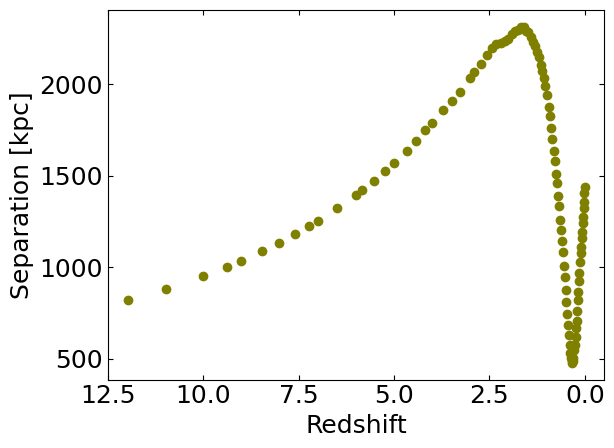

In [17]:
plt.scatter(redshifts, seps, color='olive')
plt.xlabel("Redshift")
plt.ylabel("Separation [kpc]")
plt.xlim(12.5,-0.5)
plt.show()

This plot does not extend all the way to z=20, since the separation of the pair is undefined at snapshot 0 and 1. We can tell from the plot above that the pair does not merge, because the pair separation never reaches 0. Let's double check the merger flag of this pair:

In [18]:
orbits["MergeFlag"][0]

False

Let's plot the orbit of a pair that DOES merge. First, find a pair that merges:

In [19]:
np.where(orbits["MergeFlag"])

(array([], dtype=int64),)

Actually... there are no orbits that merge when the pair sample is selected at z=0, because these pairs exist at z=0 and can't merge before z=0. Let's do the same thing for the z=1 (snapshot 50) pair sample.

In [20]:
# initialize the dictionary structure
orbits_z1 = {}

f = h5py.File(f"{paths.path_orbits}highmass_major_50.hdf5", "r")
for key, val in f.items():
    if key == "Header":
        # we are doing to ignore the header data for now~ 
        continue 
    orbits_z1[key] = np.array(val)
f.close()  # <---- the most important line in this cell to include!! 

We can get a list of the pairs that do and do not merge from this sample: 


In [21]:
do_merge = np.where(orbits_z1["MergeFlag"])[0]
do_merge_not = np.where(~orbits_z1["MergeFlag"])[0]


First 10 indices of mergers and non-mergers:

In [22]:
do_merge[0:10] 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
do_merge_not[0:10]

array([ 0, 20, 22, 25, 29, 41, 48, 64, 67, 70])

So let's plot the pairs with indices 4 (a merger) and 22 (a non-merger)

In [24]:
merger = orbits_z1["Separations"][4]
merger_not = orbits_z1["Separations"][22]

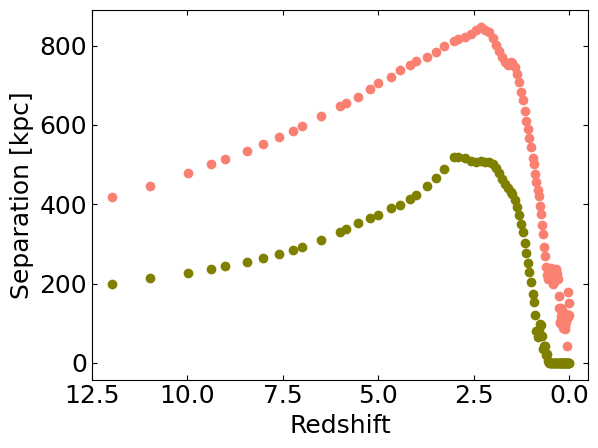

In [25]:
plt.scatter(redshifts, merger, color='olive', label="Merger")
plt.scatter(redshifts, merger_not, color='salmon', label="Non-merger")
plt.xlabel("Redshift")
plt.ylabel("Separation [kpc]")
plt.xlim(12.5,-0.5)
plt.show()

It's hard to see what's going on at low redshift. Let's zoom in on that region:

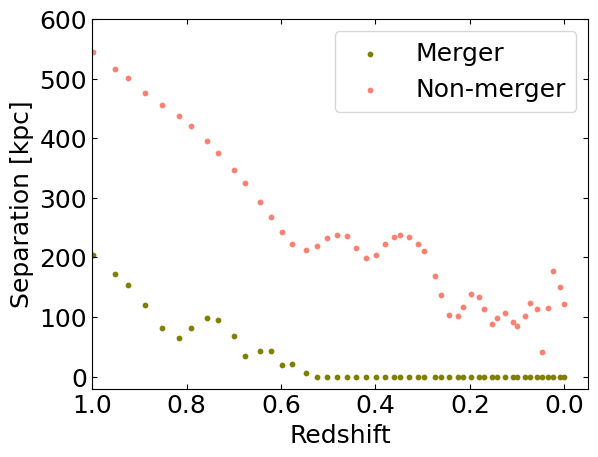

In [26]:
plt.scatter(redshifts, merger, color='olive', label="Merger",s=10)
plt.scatter(redshifts, merger_not, color='salmon', label="Non-merger",s=10)
plt.xlabel("Redshift")
plt.ylabel("Separation [kpc]")
plt.xlim(1,-0.05)
plt.ylim(-20,600)
plt.legend()
plt.show()

We can also easily plot this as a function of lookback time instead: 

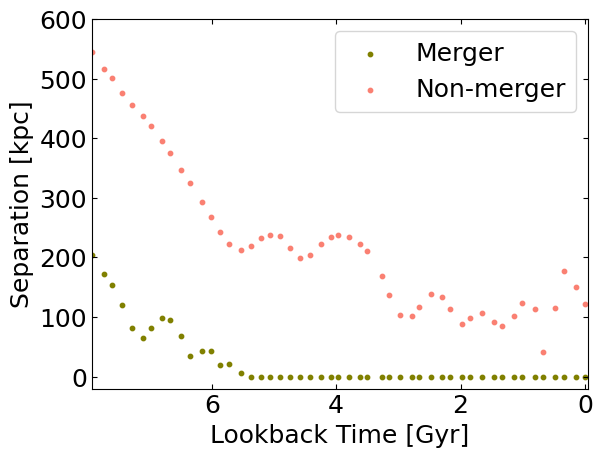

In [27]:
lookback = convert["Lookback Time"]
lbt_at_z1 = convert['Lookback Time'][50]

plt.scatter(lookback, merger, color='olive', label="Merger",s=10)
plt.scatter(lookback, merger_not, color='salmon', label="Non-merger",s=10)
plt.xlabel("Lookback Time [Gyr]")
plt.ylabel("Separation [kpc]")
plt.xlim(lbt_at_z1, -0.05)
plt.ylim(-20, 600)
plt.legend()
plt.show()

Thus, we see that the green pair merged at around z = 0.5-0.6 or 5-6 Gyr ago! 

<font color='grey'> *author:* Dr. Katie Chamberlain  -- May 2024